data source: https://www.kaggle.com/sid321axn/amazon-alexa-reviews#amazon_alexa.tsv

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('amazon_alexa.tsv',sep='\t')

In [3]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [4]:
df.shape

(3150, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
rating              3150 non-null int64
date                3150 non-null object
variation           3150 non-null object
verified_reviews    3150 non-null object
feedback            3150 non-null int64
dtypes: int64(2), object(3)
memory usage: 123.1+ KB


In [6]:
df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [7]:
df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [8]:
df['length'] = df['verified_reviews'].apply(len)
df.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [9]:
df['rating'].value_counts()

5    2286
4     455
1     161
3     152
2      96
Name: rating, dtype: int64

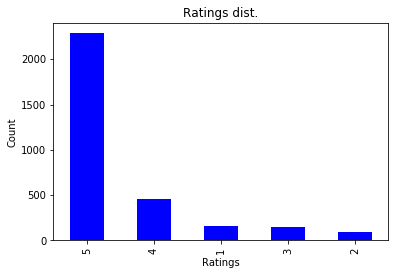

In [10]:
df['rating'].value_counts().plot(kind='bar',color='b')
plt.title('Ratings dist.')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

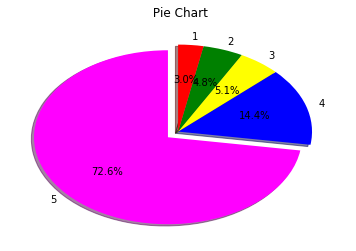

In [11]:
labels = '5', '4', '3', '2', '1'
sizes = [2286, 455, 161, 152, 96]
colors = ['magenta', 'blue', 'yellow','green','red']
explode = [0.1, 0, 0, 0, 0]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, autopct = '%1.1f%%', startangle = 90, shadow = True)
plt.title(' Pie Chart')
plt.show()

In [12]:
df.feedback.value_counts()

1    2893
0     257
Name: feedback, dtype: int64

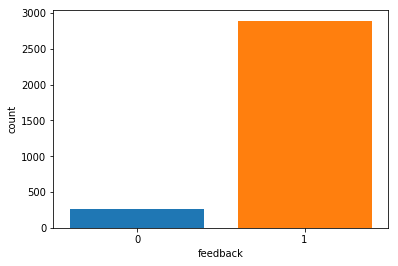

In [13]:
sns.countplot(x = df['feedback'], data = df, saturation = 1)

Text(0.5,1,'Most Frequently Occuring Words - Top 20')

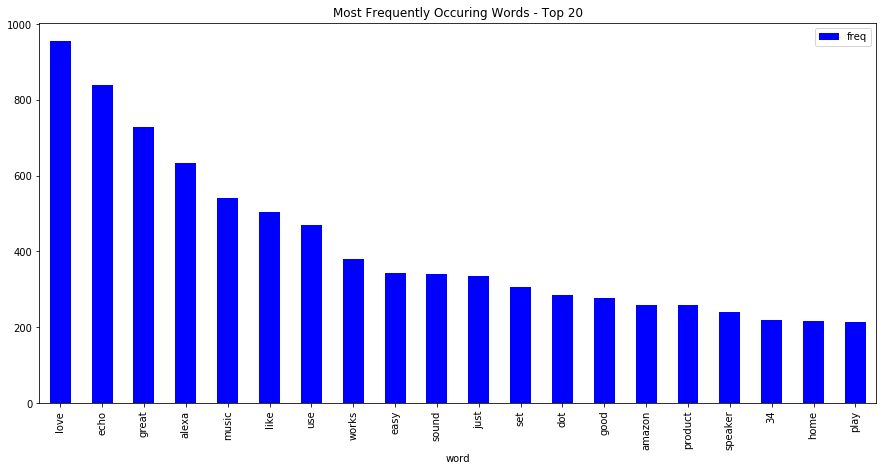

In [16]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(df.verified_reviews)
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])


frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'b')
plt.title("Most Frequently Occuring Words - Top 20")

Text(0.5,1,'WordCloud - Vocabulary from Reviews')

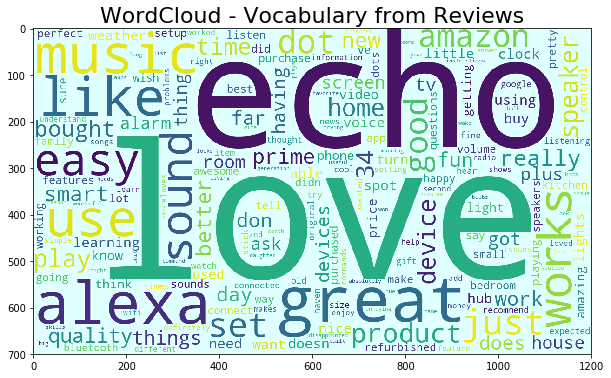

In [17]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'lightcyan', width = 1200, height = 700).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)

In [18]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
wl = WordNetLemmatizer()
import re

In [19]:
corpus = []
for i in range(0,len(df)):
    review = re.sub('[^A-Za-z]',' ',df['verified_reviews'][i])
    review = review.lower()
    review = review.split()
    review = [wl.lemmatize(word) for word in review if word not in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [21]:
X = cv.fit_transform(corpus).toarray()
y = df.feedback

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [23]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [24]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
y_pred = lr.predict(X_test)

In [26]:
y_pred[333:344]

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

In [27]:
y_test.iloc[333:344]

2453    1
2918    1
3105    1
2674    1
166     1
124     1
2594    0
682     1
2329    1
572     1
1198    1
Name: feedback, dtype: int64

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 

In [29]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 27,  61],
       [  6, 851]], dtype=int64)

In [30]:
classification_report (y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.82      0.31      0.45        88\n           1       0.93      0.99      0.96       857\n\n    accuracy                           0.93       945\n   macro avg       0.88      0.65      0.70       945\nweighted avg       0.92      0.93      0.91       945\n'

In [31]:
accuracy_score(y_test,y_pred)

0.9291005291005291

In [32]:
from imblearn.over_sampling import SMOTE

In [33]:
sm = SMOTE()

In [34]:
X_train_smote, y_train_smote = sm.fit_sample(X_train.astype('float'),y_train)

In [35]:
from collections import Counter

In [36]:
print('before smote :',Counter(y_train))
print('after smote: ',Counter(y_train_smote))

before smote : Counter({1: 2036, 0: 169})
after smote:  Counter({1: 2036, 0: 2036})


In [37]:
lr.fit(X_train_smote,y_train_smote)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
y_pred = lr.predict(X_test)

In [39]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 74,  14],
       [ 82, 775]], dtype=int64)

In [40]:
accuracy_score(y_test,y_pred)

0.8984126984126984